In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-23 18:06:07.021598: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-23 18:06:07.045839: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 18:06:07.159309: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 18:06:07.160477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [49]:
df_rating_raw[df_rating_raw['Title'] == 'West Side story']

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1814312,B000711OZC,West Side story,NaN,A3FV7U97W17PK,"M. Chaerani ""music sheet collector""",26/26,5.0,1145491200,Great transcription of the full score,If you're looking for a faithful translation f...
1814313,B000711OZC,West Side story,NaN,A14ES1GLFF6RZ9,"The Pianoman ""Producer/Arranger""",6/7,5.0,1189987200,West Side Vocal Score,If you want to play/arrange/orchestrate or sim...
1814314,B000711OZC,West Side story,NaN,APYTEBHJXFT18,Teen,4/5,4.0,1167177600,For the intermediate,The book is medium-it isn't an easy book you o...
1814315,B000711OZC,West Side story,NaN,A3H9EZYOVG81TW,Broadway Fan,1/1,5.0,1332374400,West Side Story,This book is perfect. We are rehearsing West S...
1814316,B000711OZC,West Side story,NaN,A1IWMVQGALYNVK,C. Morgan,3/4,5.0,1199145600,High Quality Printing,The piano and vocals are clearly printed which...
1814317,B000711OZC,West Side story,NaN,AZUS7ZIZWEJ0B,"Rebecca L. Gosselin ""Capegirl78""",0/0,5.0,1355702400,Fab!,this was perfect - I wanted to real versions o...
1814318,B000711OZC,West Side story,NaN,A1F2FPNK5VBJZ4,"W. Smith ""Future Tony Winner""",0/0,5.0,1264636800,A Composer/Orchestrator's Best Friend,My original intention was to buy this and use ...
1814319,B000711OZC,West Side story,NaN,A2DGD1PGXR5BZM,Olivertrst,0/1,3.0,1319241600,Disappointed -- Bent in shipping,I was disappointed when I received this book i...
1814320,B000711OZC,West Side story,NaN,A1GURUV4HPAWFU,Krista Cronin,2/9,5.0,955411200,West Side Story is Fabulous,"The music from West Side Story is captivating,..."


In [4]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1814320,B000711OZC,West Side story,NaN,A1GURUV4HPAWFU,Krista Cronin,2/9,5.0,955411200,West Side Story is Fabulous,"The music from West Side Story is captivating,..."
2844254,B000GSDG8E,"Rich Dad, Poor Dad",NaN,AR89RECR2PN88,iqi616,57/60,5.0,998352000,Wealth by stealth,"Yeah, so he's a really annoying kind of guy bu..."
181569,1593355408,The Sherbrooke Twins (Bride Series),NaN,NaN,NaN,2/3,5.0,1077926400,Engrossing Coulter Mystery and Family Dyamic w...,"Like many readers, I have been a fan of Coulte..."
880739,B000NPEWHE,Harry Potter and the Chamber of Secrets,NaN,A1JIOHB3X85JPA,"Connie ""Connie""",1/1,5.0,1333324800,"finally, e-book Potter",My 10yo daughter is obsessed with HP. She's be...
2401953,B000716OZW,"Brown bear, Brown bear, what do you see?",NaN,AMKR3YAQD4FBP,"K. Robeck ""BOOKWORM""",0/0,5.0,1356912000,Brown brear,I bought this book as a gift for my 2 year old...
2988202,0904724719,Alice in Wonderland (Tell tales),NaN,A2YVA1DQK1PUMK,Rachael,1/2,5.0,1353196800,Great book!,I love everything about this book and highly r...
1580529,0066213002,Scaredy Cat: A Novel,NaN,A131T9NLMRGSYT,PurlyGates,0/1,5.0,1340928000,Interesting book,It takes a bit of getting use to the Brit ling...
1600994,0814798411,A Critical Introduction to Queer Theory,16.01,A3UOZ07A8QO0K1,Pablo Herrera,5/5,5.0,1322870400,Perfect for beginners,If you are trying to understand what the hell ...
439855,B000FFDWOG,The Slippery Slope,NaN,A2D14Z6CXDUBS6,"""sonysummer""",4/5,4.0,1064361600,The best yet!,"This, the tenth book in the ""Series of Unfortu..."
85688,B000J521DU,"ERAGON: INHERITANCE, BOOK ONE.",NaN,NaN,NaN,6/7,5.0,1141516800,AWESOME! A MUST READ NO MATTER WHAT AGE!,This is by far the best book I've ever read! I...


In [5]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
62905,The Wonder Clock,NaN,['Howard Pyle'],http://books.google.com/books/content?id=rwwCA...,http://books.google.com/books?id=rwwCAAAAYAAJ&...,NaN,1887,https://play.google.com/store/books/details?id...,"[""Children's poetry""]",2.0
164202,"Transport Logistics: Past, Present and Predict...",32-year industry veteran Issa Baluch examines ...,['Issa Baluch'],http://books.google.com/books/content?id=TpsgA...,http://books.google.com/books?id=TpsgAQAAMAAJ&...,NaN,2005,http://books.google.com/books?id=TpsgAQAAMAAJ&...,['Business logistics'],NaN
162516,How to Minister Freedom: Helping Others Break ...,"This book, a compilation of four essential res...",['Doris M Wagner'],http://books.google.com/books/content?id=xBU7r...,http://books.google.com/books?id=xBU7rIqW2ScC&...,Gospel Light Publications,2005-05-18,http://books.google.com/books?id=xBU7rIqW2ScC&...,['Religion'],3.0
90902,Home Is Where the Boat Is,"""She Sheds provides inspiration, tips, and tri...",['Erika Kotite'],http://books.google.com/books/content?id=5bTFD...,http://books.google.com/books?id=5bTFDQAAQBAJ&...,NaN,2017-01-15,http://books.google.com/books?id=5bTFDQAAQBAJ&...,['House & Home'],NaN
103982,The Promissory Note,NaN,['Julius Seesel Waterman'],NaN,http://books.google.com/books?id=sF-MNQEACAAJ&...,NaN,1930*,http://books.google.com/books?id=sF-MNQEACAAJ&...,['Promissory notes'],NaN
26914,Ghosts in Residence,NaN,['Hans A. Von Behr'],NaN,http://books.google.com/books?id=Q0_jAAAACAAJ&...,North Country Books Incorporated,1986,http://books.google.com/books?id=Q0_jAAAACAAJ&...,['Ghosts.'],NaN
195388,Montreal 1979: Tournament of Stars (Russian Ch...,NaN,"['Mihails Tāls', 'V. Chepizhnyĭ', 'Aleksandr R...",http://books.google.com/books/content?id=RHtYA...,http://books.google.com/books?id=RHtYAAAAYAAJ&...,Pergamon,1980,http://books.google.com/books?id=RHtYAAAAYAAJ&...,['Chess'],NaN
187908,Restoring the Foundations: An Integrated Appro...,NaN,"['Chester D. Kylstra', 'Betsy Kylstra']",http://books.google.com/books/content?id=rA4MA...,http://books.google.com/books?id=rA4MAAAACAAJ&...,Proclaming His Word Incorporated,2001-01,http://books.google.com/books?id=rA4MAAAACAAJ&...,['Religion'],NaN
182331,Uniform Commercial Code (Hornbook series),NaN,"['James J. White', 'Robert S. Summers']",NaN,http://books.google.com/books?id=zmKwzQEACAAJ&...,NaN,1988,http://books.google.com/books?id=zmKwzQEACAAJ&...,['Commercial law'],NaN
178720,Men's Health the Book of Muscle: The World's M...,A new kind of fitness book: a celebration of m...,"['Ian King', 'Lou Schuler']",http://books.google.com/books/content?id=KLEV1...,http://books.google.com/books?id=KLEV1BJT7g4C&...,Pan Macmillan,2004,http://books.google.com/books?id=KLEV1BJT7g4C&...,['Bodybuilding'],NaN


In [7]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/helpfulness: Unncesary column for current analysis
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.  
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/helpfulness','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [10]:
df_rating_processed.sample(10)

,Title,User_id,review/score,review/time,review/text
1602541,"The Gunslinger (The Dark Tower Ser., Bk. I)",A1AD617YGH65OT,1.0,1341100800,To those considering buying all 7 books on kin...
1611281,I Didn't Plan to Be a Witch and Other Surprise...,A7W5WQIWXJ1OM,5.0,931132800,I'm a teenager and I happened to read this boo...
138719,The Secret History of the Pink Carnation,A36CCAF2JGV7RS,5.0,1154131200,I found this book at Border's by mistake. I ha...
229125,Feynman's Rainbow: A Search for Beauty in Phys...,NaN,2.0,1070755200,I guess I'm not sure what I expected but the b...
2456202,Sense & Sensibility Cds (Penguin Classics),A4OYPKTD3O8UD,4.0,1167782400,"The type was readable, illustrations interesti..."
1061012,Out of Sheer Rage: In the Shadow of D. H. Lawr...,A1G9VWD3XHKQLM,2.0,1341187200,I have heard people rave about Dyer's writing ...
666361,Adult Bipolar Disorders: Understanding Your Di...,ABCMTI1SYVQRI,5.0,1026259200,I bought this expecting some kind of basic boo...
1684734,Ten Tiny Tickles,A3UL0JOXSJ63XN,5.0,1355616000,My granddaughter is almost three and she loves...
50483,The Princess of Dhagabad (Spirits of the Ancie...,AFZM5UK3MJWGU,5.0,962928000,I got this book a few days ago and I simply co...
2688915,How to think ahead in chess;: The methods and ...,NaN,4.0,978912000,This book will help intermediate players gain ...


In [11]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/summary': 'summary',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [12]:
df_rating_processed.isna().sum()

title             208
user_id        561787
review              0
review_time         0
text                8
dtype: int64

In [13]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [14]:
#CLEAN THE DATASETS

In [15]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [16]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
189744,Ending Affirmative Action: The Case For Colorb...,['Terry Eastland'],Basic Books,1996,['History']
52880,Genesis Part I: God and His Creation (Hearts A...,['Frederick W. Marks'],Emmaus Road Publishing,2012,['Religion']
153437,The Struggle and the Triumph: An Autobiography,"['Lech Wałęsa', 'Lech Wałes̜a', 'Lech Wał*esa'...",Arcade Publishing,1992,['Biography & Autobiography']
127983,Fortune's Hand,['Belva Plain'],Hachette UK,2016-01-21,['Fiction']
131698,Veronica's Room: A New Thriller (Samuel French),['Ira Levin'],NaN,1989,NaN


In [17]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [18]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [19]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [20]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
4768,The fighter kite book!,['David Gomberg'],NaN,['Kites'],1992
49918,The Nature of God: An Inquiry into Divine Attr...,['Edward R. Wierenga'],NaN,['God'],2003
108874,Assault: The Crippled Champion: The King Ranch...,['Marjorie Hodgson Parker'],NaN,['Juvenile Nonfiction'],2004
80686,Fine Feathers And Other Stories,['Edward Frederic Benson'],"Oxford University Press, USA",['England'],1994
160054,"Fallen Stars, Bitter Waters - America Has Fall...","['Gilbert Morris', 'Lynn Morris', 'Alan Morris']",Thomas Nelson Incorporated,['Fiction'],2000
71458,"Practical Ethics for Students Interns, and Res...","['Charles Junkerman (M.D.)', 'Arthur Derse', '...",Univ Publishing Group,['Medical'],2008
138057,The Works of Sir Thomas Malory: Volume II (Oxf...,['Thomas Malory'],NaN,['15th century'],1967
43619,Notes and tones: Musician to musician interviews,['Arthur Taylor'],Da Capo Press,['Music'],2009
104838,The new care and training of the trotter and p...,['Curt Greene'],United States Trotting Association,['Reference'],1996
185467,"Entering the kingdom,",['James Allen'],"Cosimo, Inc.",['Religion'],2007


In [21]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [22]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [23]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [24]:
df_rating_processed.sample(5)

,title,user_id,review,review_time,text
2941746,The Hobbit,A1K2E5RVZB8G4Y,5.0,1360540800,Well the book was... well great I mean it had ...
1282644,DAYS BETWEEN STATIONS. A Novel.,A1GAFEFX1RSEN9,5.0,954633600,The cult of Steve Erickson consists of thousan...
1323661,Fences,A3II1WY9YORI7V,4.0,978998400,"The play &quot;Fences,&quot; by August Wilson,..."
541138,"""F"" is for fugitive: A Kinsey Millhone mystery",A3CH8G4A9KVLL8,1.0,999561600,I gave this book only a one star becouseit wou...
2142657,The Authority Book 2: Under New Management,A1622OLQXL8KKE,4.0,1017360000,When the creator and writer of a comic leaves ...


In [25]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [26]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year
904715,Sharpe's Eagle (Richard Sharpe's Adventure Ser...,A1HUHKCP76X5KI,5.0,This is an exciting that puts in the field wit...,2000
1258089,"The Hobbit; Or, There and Back Again",A2I2281Y45C82Y,5.0,"What is there to say? It is tried, proven and ...",2007
2439538,Molly Brown: Unraveling the Myth,NaN,4.0,I sped through this wonderful biography of Mar...,1999
222684,Chesapeake Blue (Chesapeake Bay Series),A3B6H0BNHLQ1OH,3.0,Can I say just how much I love Nora Roberts? I...,2002
1095229,The Winter Road (Harlequin Super Romance #1304),AFVQZQ8PW0L,4.0,"In Three Creeks, Manitoba Emily Moore is worri...",2005
1796444,The Great Gatsby,A1LRG8GF8CYC,4.0,"It's what's not written and the hidden, subtle...",2005
1275194,Ultrametabolism: The Simple Plan for Automatic...,A12A4I7C5YHEDH,5.0,"The book is interesting and well written, ever...",2006
1091913,Old Man & the Sea,A1LIUFNW51P46G,3.0,product delivered on time and in good conditio...,2012
112667,"Godel's proof,",AJBXZ0HYUG6L0,5.0,Early in the second decade of the twentieth ce...,2002
425173,Ashworth Hall (Charlotte & Thomas Pitt Novels),A2O5RT4RCC4NU2,4.0,Police Superintendent Thomas Pitt wants to inv...,2011


In [27]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 183.1+ MB


In [28]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
1493057,In the Company of the Courtesan: A Novel,A2ECUUDON39ERM,5.0,"When I read Birth of Venus, I knew that I was ...",2006,[Sarah Dunant],Random House Trade Paperbacks,[Fiction],2007
2516921,Hornblower and the Atropos (Hornblower Saga),A1FSJH67CYP9Y2,5.0,"This is the next Hornblower chronologically, i...",2006,[Cecil Scott Forester],NaN,[Fiction],1953
1991183,The Small Business Millionaire,ARBJ8VLKL4RJS,5.0,I could not put the book down. It is such an e...,2006,"[Steve Chandler, Sam Beckford]",Author's Choice Publishing,[Fiction],2006
49596,The Greatest Generation,A26U1OVR5NFXGK,2.0,"Although the subject matter is excellent, as a...",1999,[Tom Brokaw],Delta,[History],2001
1795015,The Psychic,AMY9DXI7HBX7W,3.0,"The Psychic is a fairly interesting read, thou...",2004,[David Marks],NaN,"[Body, Mind & Spirit]",2000
151812,1491: New Revelations of the Americas Before C...,A3H9TXMY61NL6T,5.0,I've read several other books recounting nativ...,2012,[Charles C. Mann],Nieuw Amsterdam,[History],2013
1331562,Picture of Dorian Grey (Classic Library),NaN,1.0,I did not like this piece. I feel that Oscar W...,1998,[Oscar Wilde],Bernhard Tauchnitz,None,1908
2037152,Beginning ASP Databases,A2YIIPD325FJT4,5.0,I went from having zero knowledge about access...,2000,"[Kevin Spencer, Thearon Willis, John Kauffman]",Apress,[Computers],2003
2069367,Everyday Miracles: The Inner Art of Manifestation,AJ1FNOQE7BCLF,5.0,This is the best of Spangler's books I've read...,2011,[David Spangler],Lorian Press,[Religion],2008
2641297,The Kill Clause: A Novel,AKM5X760TQ8SK,4.0,In the opening pages of Greg Hurwitz's first i...,2004,[Gregg Hurwitz],Harper Collins,[Fiction],2009


In [29]:
# Apply Pareto Rule. 20% of the most important entries can map the total dataset.
normalized_counts = df_all_data_processed['title'].value_counts(normalize=True)
sorted_normalized_counts = normalized_counts.sort_values(ascending=False)
threshold = 0.2
top_20_percent_values = sorted_normalized_counts.head(int(threshold * len(sorted_normalized_counts)))
top_20_percent_values

title
The Hobbit                                                                              0.008260
Pride and Prejudice                                                                     0.007640
Wuthering Heights                                                                       0.004043
The Giver                                                                               0.002867
Great Expectations                                                                      0.002783
                                                                                          ...   
Laboratory studies in earth history                                                     0.000004
Behind the Invasion of Iraq                                                             0.000004
Advanced ABAP Programming for SAP (SAP R/3)                                             0.000004
The Regatta Mystery and Other Stories                                                   0.000004
Book Of Proverbs: Chapte

In [30]:
df_all_data_filtered_processed = df_all_data_processed[df_all_data_processed['title'].isin(top_20_percent_values.index)]
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225188 entries, 14 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 169.8+ MB


In [31]:
#Remove books with less than 50 reviews
# N = 50
# value_counts = df_all_data_processed['title'].value_counts()
# elements_with_less_than_N_entries = value_counts[value_counts < N].index
# len(elements_with_less_than_N_entries)

# df_famous_books_data_processed = df_all_data_processed[~df_all_data_processed['title'].isin(elements_with_less_than_N_entries)]
# df_famous_books_data_processed.info()
# df_famous_books_data_processed['review'].value_counts()

In [32]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    1336158
4.0     431099
3.0     189915
1.0     153456
2.0     114560
Name: count, dtype: int64

<Axes: >

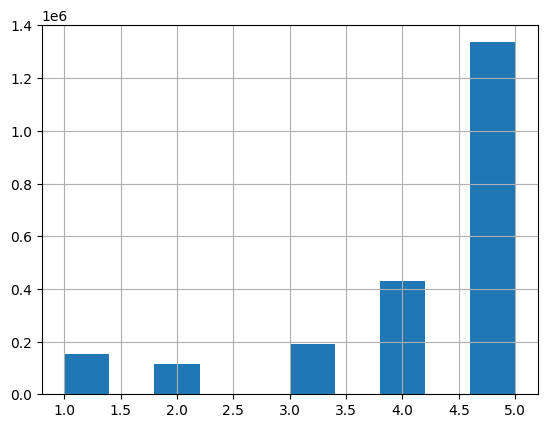

In [50]:
df_all_data_filtered_processed['review'].hist()
#Add axes.

In [33]:
pd.set_option('display.max_colwidth', 50)

In [34]:
df_all_data_filtered_processed.sample(5)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
2238970,The Unbearable Lightness of Being (Isis),A1KQ80Y692CDOI,4.0,I cannot offer many of the erudite reviews of ...,2008,None,NaN,[Audiobooks],2000
453521,"Golf My Way: The Instructional Classic, Revise...",A1OQZO7M98UY55,5.0,This is a great book by Golf's greatest player...,2013,"[Jack Nicklaus, Ken Bowden]",Simon and Schuster,[Sports & Recreation],2005
2407057,Reliquary,NaN,4.0,While falling short of surpassing the intensit...,1998,"[Douglas Preston, Lincoln Child]",NaN,[Fiction],2002
1931907,Glide Path,A2BIZFNH46MR0N,5.0,"This book is Clarke's first, and is a neat lit...",2008,[Arthur C. Clarke],"Gower Publishing Company, Limited",None,1980
1411256,Knife of Dreams (Wheel of Time),A2LKHJBJKKYFST,5.0,Great book in a great series. Loving rereading...,2013,[Robert Jordan],Macmillan,[Fiction],2010


In [35]:
sentiment_classifier = pipeline(task='sentiment-analysis', model='abilfad/sentiment-binary-dicoding')
cache_dir = os.path.expanduser('~') + '/.cache/huggingface/hub'
print(f'Huggingface cache directory: {cache_dir}')

Huggingface cache directory: /home/arnaldochm/.cache/huggingface/hub


In [36]:
os.listdir(cache_dir)

['models--distilbert-base-uncased-finetuned-sst-2-english',
 'version.txt',
 'models--abilfad--sentiment-binary-dicoding']

In [37]:
sentiment_classifier_default = pipeline('sentiment-analysis')

In [38]:
my_example_0 = sentiment_classifier_default(r'''I received this book today from Amazon and will be returning it tomorrow.The author has assembled some stunning pertraits and surrounded them with a trite attempt at an essay explaining pow to pose people for portraits.Mr. Hurter doesn't carry it off. The portraits are often beautiful, but there is no explanation of how they were acheived. The captions are often ridiculous and read like a museum curator's strained attempt at reading meaning into a canvas of paint drippings.The narrative is ofen just plain silly as when Hurter speaks of image stablization lenses that have very limited application to portraiture. Statements such as "Most photographers agree that a pleasant, happy expression is considered more desirable than a big smile" aren't worth paying money for.In sum, the serious student of photographic portraiture will find nothing of value in this book.Jerry''')
print(my_example_0)

[{'label': 'NEGATIVE', 'score': 0.9986578226089478}]


In [39]:
print(my_example_0[0].get('label'))

NEGATIVE


In [40]:
df_all_data_filtered_processed.isna().sum()

title                  0
user_id           435446
review                 0
text                   0
review_year            0
authors            41290
publisher         334080
categories        180048
published_year         0
dtype: int64

In [41]:
def apply_sentiment_analysis_model(text):

    try:
        sentiment = sentiment_classifier_default(text)[0].get('label')
        return sentiment
    except:        
        return None

In [52]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
221738,Travels With Charley,A3SMRHIU14X6TO,5.0,A wonderful read..a glimpse of America through...,2007,[John Steinbeck],Penguin,[Travel],1980
154296,The Plague,A2NTJUI2DLZF4R,5.0,"May be Camus's finest novel, displaying as it ...",2000,[Albert Camus],Vintage,[Fiction],1991
675758,30 Days to Understanding the Bible in 15 Minut...,A2I5LVVQ7WXEH6,5.0,This is a great way to teach the Bible to your...,2010,[Max E. Anders],Nelson Reference & Electronic Pub,[Religion],1998
1283801,Birds of the West Indies,NaN,5.0,"I've never actually read this book, but I just...",2002,"[Herbert A. Raffaele, James Wiley, Orlando H...",Princeton University Press,[Nature],2020
1204452,"Lean and Luscious and Meatless, Volume 3",A1GO23GVG48E2J,4.0,"Having newly changed my diet to vegan, this bo...",2009,"[Bobbie Hinman, Millie Snyder]",Prima Lifestyles,[Cooking],1998
2633223,Sin City Volume 1: The Hard Goodbye (3rd Edition),A2W4FO4KKFFWU7,5.0,"Whoa, dude! What an exciting book! I consider ...",2006,[Frank Miller],Dark Horse Comics,[Comics & Graphic Novels],2010
934105,The Pragmatic Programmer: From Journeyman to M...,AJX6AZBZ36SX0,5.0,The ideas and advice of this book are so sprea...,2012,"[Andrew Hunt, David Thomas]",Addison-Wesley Professional,[Computers],1999
1868465,Maurice: A novel,NaN,5.0,"we have here, to my knowledge, the finest book...",1997,[Edward M. Forster],NaN,None,1971
1531256,A House for Hermit Crab (World of Eric Carle),A3RMCI57ODVHDV,5.0,...And that it is what this book is teaching c...,2000,[Eric Carle],Simon Spotlight,[Juvenile Fiction],2014
508904,The Mask of Command (Leather-bound Library of ...,NaN,4.0,I have always viewed fans of military history ...,1999,[John Keegan],NaN,[Command of troops],1994


In [53]:
#Recomendacion de Manu para procesamiento


df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

/tmp/ipykernel_5261/2509483922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))


,num_row,text
768605,674826,"""A Lesson Before Dying"" begins in a small town..."
1989378,1681163,This book is adorable. Our first language is e...
84203,76054,This was a tough one. It felt as though the au...
26222,23496,I'm a highschool freshmen and I read the book ...
1744464,1483487,Wings of Dawn is a book I would highly recomme...
153178,139134,This was a totally cool book. It was filled wi...
883683,769995,I was searching for a book regarding speaking ...
1045304,904955,I got this book purely by accident when I forg...
2269349,1908092,"""Survivor In Death"" is the 23rd book in the ""I..."
1127419,973590,"This is a magnificent, thoughtful, lyrical wor..."


In [ ]:
# for i in range() #Ciclo for para pasarle al analizador de sentimientos de 100 en 100.

# timeit function: Permite tomar el tiempo a la funcion que estamos haciendo.

In [42]:
# #Creating a New column with sentiment prediction result from Hugging Face abilfad/sentiment-binary-dicoding model.
# df_all_data_filtered_processed['text_sentiment'] = df_all_data_filtered_processed['text'].apply(lambda x: apply_sentiment_analysis_model(x))

# df_all_data_filtered_processed.sample(10)

#También puedo llamar un script de python. Para que haga el procesamiento.

#Python Dask.

#Apache Spark - Paralelismo con maquinas (nodos)

In [43]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
1395150,The Lord of the Rings (3 Volume Set),A2G2Q3BYNQXASC,2.0,This is one of the most acclaimed works in mod...,1999,[J. R. R. Tolkien],NaN,"[Baggins, Bilbo (Fictitious character)]",1996
1384705,Alice in Wonderland,NaN,5.0,I read Alice in Wonderland as a child and have...,1998,[Lewis Carroll],NaN,[Adventure and adventurers],1869
1420822,"Desecration: Left Behind, Volume 9",A1Q6IGTQ01JAZV,4.0,"Yes, I am still reading these books and I am s...",2004,"[Tim F. LaHaye, Jerry B. Jenkins]","Tyndale House Publishers, Inc.",[Fiction],2011
1081626,Me? Obey Him?,NaN,5.0,An essential handbook for for the sadly misled...,1998,[Elizabeth Rice Handford],Sword of the Lord Publishers,[Marriage],1995
1000042,Fiona Range,AOR3JKZ9QEFVN,2.0,You can almost see MMM trying to bring out the...,2002,[Mary McGarry Morris],Penguin,[Fiction],2001
776372,The War of the Worlds,ACV1LQOTQGJD6,4.0,When one listens to this tape you have to real...,2001,[H. G. Wells],First Avenue Editions ™,[Fiction],2017
1373364,To kill a mockingbird,NaN,5.0,To Kill A Mockingbird deals with large world i...,1999,[Harper Lee],Harper Collins,[Fiction],2014
64452,A Tree Grows in Brooklyn,A29OFQ7ZDJLCI2,5.0,This story is basically about the struggle to ...,2001,[Betty Smith],Random House,[Fiction],1992
31165,The biography of a grizzly,NaN,5.0,"I acquired this book at age 9-10. Now, at age ...",1999,[Ernest Thompson Seton],University of Oklahoma Press,[Nature],2015
369951,Perl and CGI for the World Wide Web (Visual Qu...,A3AX4XM1LHS0GU,3.0,The problem I found with this book was it's si...,2005,"[Castro, Negrino]",NaN,None,2003


In [44]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [45]:
# df_all_data_filtered_processed.boxplot(column=['review'])
# plt.show()

# df_rating_processed.hist(column=['review'])
# plt.show()

# df_rating_processed[df_rating_processed['title']== 'The Hobbit']['review'].mean()

# df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].describe()

# df_rating_processed[df_rating_processed['Title']== 'Atlas Shrugged']['review/score'].describe()